In [1]:
from scraper import page_links, textfromlink
from preprocessing import text_data

In [2]:
# Let's assign a variable named 'url' to the website we intend to scrape
url = 'http://shakespeare.mit.edu/'

In [3]:
# Let's extract the home_links and internal_links from the entire website
home_links, internal_links = page_links(url)

In [4]:
# Let's extract the text from each internal_link and stitch them together into a single string
full_text = textfromlink(internal_links)

In [5]:
# Let's extract the clean_word_tokens, filtered_clean_word_tokens, tagged_filtered_clean_word_tokens, word_tokens, sent_tokens, words_fdist, namedEnt
clean_word_tokens, filtered_clean_word_tokens, tagged_filtered_clean_word_tokens, word_tokens, sent_tokens, words_fdist, namedEnt = text_data(full_text)

In [6]:
# Looking into all the variables created
%whos

Variable                            Type        Data/Info
---------------------------------------------------------
clean_word_tokens                   list        n=835941
filtered_clean_word_tokens          list        n=409798
full_text                           str         In delivering my son from<...>nts may ne'er it ruinate.
home_links                          list        n=43
internal_links                      list        n=945
namedEnt                            Tree        (S\n  delivering/VBG\n  s<...>B\n  er/NN\n  ruinate/NN)
page_links                          function    <function page_links at 0x00000220643C30D0>
sent_tokens                         list        n=53829
tagged_filtered_clean_word_tokens   list        n=409798
text_data                           function    <function text_data at 0x0000022065C6AF28>
textfromlink                        function    <function textfromlink at 0x0000022064995EA0>
url                                 str         http://shakespear

In [7]:
# Let's look at the Frequency Distribution dictionary
words_fdist

FreqDist({('shall', 'MD'): 3600, ('thou', 'NN'): 3157, ('thy', 'JJ'): 3090, ('good', 'JJ'): 2843, ('would', 'MD'): 2326, ('well', 'RB'): 2223, ('lord', 'NN'): 2134, ('man', 'NN'): 2004, ('one', 'CD'): 1757, ('like', 'IN'): 1755, ...})

In [8]:
def plot_freqdist_freq(fdist,
                       max_num=None,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2):
    """
    As of NLTK version 3.2.1, FreqDist.plot() plots the counts 
    and has no kwarg for normalising to frequency. 
    Work this around here.
    
    INPUT:
        - the FreqDist object
        - max_num: if specified, only plot up to this number of items 
          (they are already sorted descending by the FreqDist)
        - cumulative: bool (defaults to False)
        - title: the title to give the plot
        - linewidth: the width of line to use (defaults to 2)
    OUTPUT: plot the freq and return None.
    """

    tmp = fdist.copy()
    norm = fdist.N()
    for key in tmp.keys():
        tmp[key] = float(fdist[key]) / norm

    if max_num:
        tmp.plot(max_num, cumulative=cumulative,
                 title=title, linewidth=linewidth)
    else:
        tmp.plot(cumulative=cumulative, 
                 title=title, 
                 linewidth=linewidth)

    return

In [9]:
# Let's plot the normalized word frequency distribution for the Top 30 words
plot_freqdist_freq(words_fdist, max_num=30)

<Figure size 640x480 with 1 Axes>

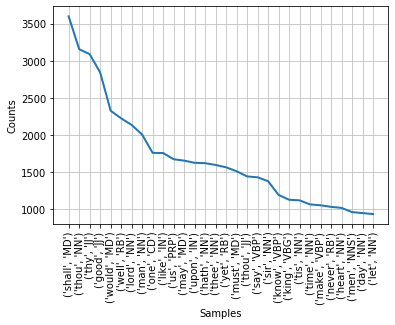

In [10]:
# Let's plot the counts of the frequency distribution for the Top 30 words
words_fdist.plot(30)